# Homework 5 - Machine Learning and Computational Statistics
### Ilias Katsampalos

### Exercise 1
### a) 
The MSE criterion can be broken down to 2 components, variance and $bias^2$  

$$
\begin{align}
MSE &= E_D[(f(x;D) - E[y|x])^2]\\
&= E_D[(f(x;D)-E[f(x;D)])^2] + (E[f(x;D)] - E[y|x])^2
\end{align}
$$
In order for the MSE to be 0 we would need
* $f(x;D)= E[f(x;D)]$ in order to eliminate variance
* $E[f(x;D)] = E[y|x]$ in order to eliminate the bias

### b)
For a given dataset $D$ it would be impossible to achieve $f(x;D)= E[f(x;D)]$. We would need to sample the whole population which is not something that can be achieved in reality. We can find unbiased estimators but the main reason that the MSE cannot become 0 is the variance component

### Exercise 2
### a)
A large error value on the training set indicates bias. Our model is systematically over/underestimating the true parameter $\boldsymbol{θ}$. We will need to increase the complexity of the model and/or increase the size of our data
### b) 
A large error value on the test set indicates either large bias or large variance. 
* If our model suffers from bias, then the error on the train set will also be large. We will need to change the model or add more free parameters to better fit our data
* If our model suffers from variance, then the error on the train set will be very low. In essence we have overfitted our train set and we are not able to generalize well on data which the model has not learned upon. In order to mitigate this issue, we would need to introduce some bias, for example use regularization 

### c)
A small error on the training set indicates that our model suffers from variance. We have overfitted our data and we are not able to generalize properly on the test data. Regularization could be one of the remedies to reduce variance
### d)
A small error value on the test set indicates that we achieved to generalize properly, since the model was able to perform on data which it has not been trained upon. Although, we should pay extra attention on the size of the test set, since this small value could be accidental. It would be safer to assume a good performance in case the small value was a result of a cross validation routine.

### Exercise 3
### a)
We know that $p(x,y)=\frac{3}{2}, x \in (0,1), y \in (x^2,1)$
We will integrate the joint densities in order to prove that $p(x,y)$ is indeed a pdf
$$
\begin{align}
&\int_{0}^{1}\int_{x^2}^{1}\frac{3}{2}dydx 
=\int_{0}^{1}\frac{3}{2} - \frac{3}{2}x^2dx
=\int_{0}^{1}\frac{3}{2}dx - \int_{0}^{1}\frac{3}{2}x^2dx
=\frac{3}{2} - \frac{3}{6} = 1
\end{align} $$
so indeed it is pdf

### b)
$p_X(x) = \int_{x^2}^{1}\frac{3}{2}dy = \frac{3}{2}(1-x^2)$

### c)
$p_{Y|X}(y|x) = \frac{p_{X,Y}(x,y)}{p_X(x)} = \frac{1}{1-x^2}$

### d)
$E[y|x] = \int_{x^2}^{1} y p_{Y|X}(y|x)dy = \int_{x^2}^{1} y \frac{1}{1-x^2}dy =\frac{1}{2(1-x^2)} - \frac{x^4}{2(1-x^2)} = \frac{(1-x^2)(1+x^2)}{2(1-x^2)} = \frac{1+x^2}{2}$

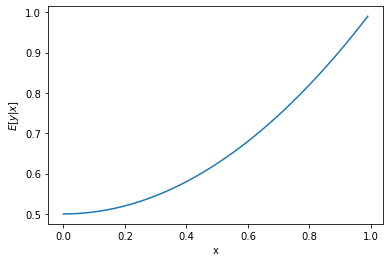

In [2]:
import numpy as np
from matplotlib import pyplot as plt
X = np.linspace(0,1,100,endpoint=False)
E_y_given_x = (1+X**2)/2
plt.plot(X, E_y_given_x)
plt.xlabel('x')
plt.ylabel('$E[y|x]$')
plt.show()

### Exercise 4

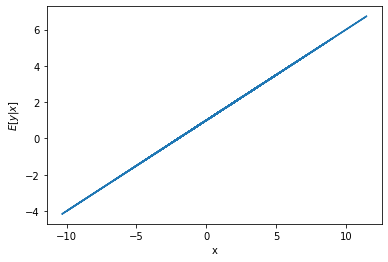

In [6]:
#a) the E[y|x]
m = [2,2]
cov = np.array([[3,2],[2,4]])
E_y_given_x = lambda x: 2 + cov[0,1] / cov[1,1] * (x - 2)
#generate random data just for plotting the line
X_line = np.random.normal(2,4,100)
plt.plot(X_line, E_y_given_x(X_line))
plt.xlabel('x')
plt.ylabel('$E[y|x]$')
plt.show()

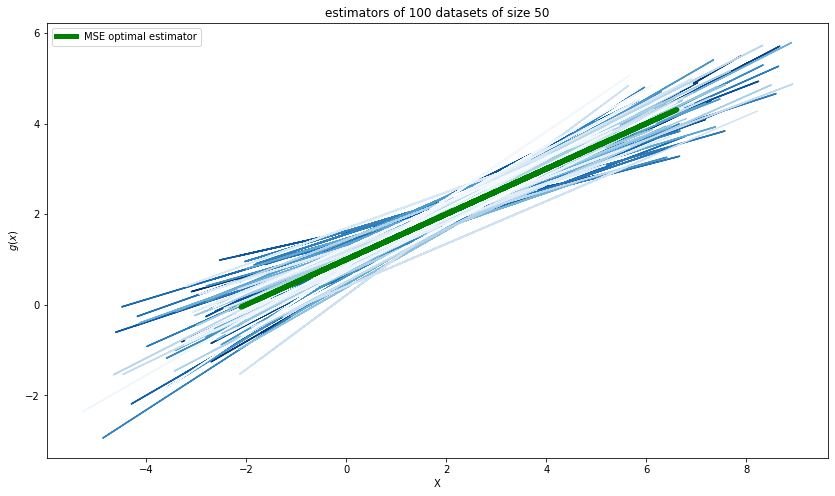

In [7]:
#b,c,d)
plt.figure(figsize=(14, 8))
cmap = plt.get_cmap('Blues_r')
colors = iter(cmap(np.linspace(0,1,100)))

for i in range(100):
    np.random.seed(i)
    data = np.random.multivariate_normal(m,cov,50)
    X = data[:,1]
    Y = data[:,0]
    X = np.column_stack([np.ones(50),X])
    thetas = np.linalg.inv(X.T@X)@X.T@Y
    plt.plot(X[:,1], X@thetas, color=next(colors))
plt.plot(X[:,1], E_y_given_x(X[:,1]), color = 'green', label='MSE optimal estimator', linewidth=5)
plt.xlabel('X')
plt.ylabel('$g(x)$')
plt.title('estimators of 100 datasets of size 50')
plt.legend()
plt.show()

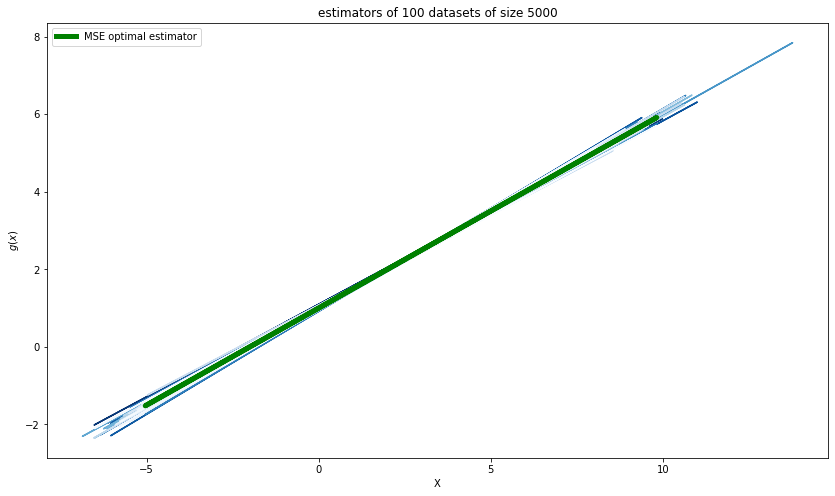

In [8]:
#e)
plt.figure(figsize=(14, 8))
cmap = plt.get_cmap('Blues_r')
colors = iter(cmap(np.linspace(0,1,100)))

for i in range(100):
    np.random.seed(i)
    data = np.random.multivariate_normal(m,cov,5000)
    X = data[:,1]
    Y = data[:,0]
    X = np.column_stack([np.ones(5000),X])
    thetas = np.linalg.inv(X.T@X)@X.T@Y
    plt.plot(X[:,1], X@thetas, color=next(colors))
plt.plot(X[:,1], E_y_given_x(X[:,1]), color = 'green', label='MSE optimal estimator', linewidth=5)
plt.xlabel('X')
plt.ylabel('$g(x)$')
plt.title('estimators of 100 datasets of size 5000')
plt.legend()
plt.show()

#### f
In the case of having datasets of size 50, the estimators have big variance as well as bias. By increasing the number of datapoints of each dataset to 5000, we were able to reduce not only the bias but the variance as well

### Exercise 5

In [15]:
#a)
train = np.random.multivariate_normal(m,cov,100)
Y_train, X_train = train[:,0], train[:,1]
X_train = np.column_stack([np.ones(len(train)), X_train])

In [16]:
#b)
thetas = np.linalg.inv(X_train.T@X_train)@X_train.T@Y_train

In [17]:
#c)
test = np.random.multivariate_normal(m,cov,50)
Y_test, X_test = test[:,0], test[:,1]
X_test = np.column_stack([np.ones(len(test)), X_test])

predictions = X_test @ thetas

In [18]:
#d)
optimal_predictions = E_y_given_x(X_test[:,1])

### e)
we could use the Root Mean Square Error (RMSE).
$$\sqrt{\frac{\sum_{i=1}^{n}(y_i-\hat{y_i})^2}{n}}$$
* Differences are squared so positive and negative differnces do not offset each other.
* Big differnces penalize the error even more than smaller ones
* averaging and taking the square root has better interpretability in a production/business environment

Since by definition the minimum MSE estimator achieves the best performance by design, we could compare the predictions of that estimator with our least squares estimator

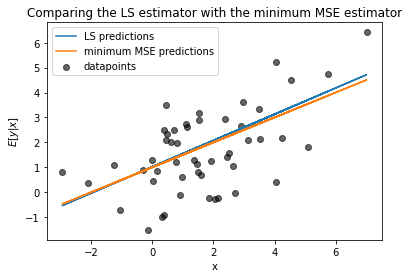

RMSE = 0.08185793800599725 . On average we predict 0.08 units worse than the optimal MSE estimator


1.786208577143336

In [20]:
plt.scatter(X_test[:,1], Y_test, label = 'datapoints', color = 'black', alpha = 0.6)
plt.plot(X_test[:,1], predictions, label = 'LS predictions')
plt.plot(X_test[:,1], optimal_predictions, label = 'minimum MSE predictions')
plt.legend()
plt.xlabel('x')
plt.ylabel('$E[y|x]$')
plt.title('Comparing the LS estimator with the minimum MSE estimator')
plt.show()

#calculate the RMSE
rmse = np.sqrt(np.mean((optimal_predictions - predictions)**2))
print('RMSE =', rmse,'. On average we predict 0.08 units worse than the optimal MSE estimator')
np.mean((Y_train - E_y_given_x(X_train[:,1]))**2)

### Exercise 6

In [26]:
#a)
np.random.seed(123)
#create 200 points from the random uniform
data = np.random.uniform(0,1,(200,2))
#keep the data points where Y > X**2 until the 100th row
data = data[np.where(data[:,1] > data[:,0]**2)]
data = data[:100]

X,Y = data[:,0], data[:,1]

#calculate the optimal MSE estimate
E_y_given_x = lambda x: (1+x**2)/2
y_hat = E_y_given_x(X)

In [27]:
#b)
sample_means = np.mean(data,axis=0)
sample_cov = (sample_means - data).T @ (sample_means - data) /  len(data)

In [28]:
#c)
E_y_given_x_normal = lambda x: sample_means[1] + sample_cov[0,1] / sample_cov[0,0] * (x - sample_means[0])
y_hat_normal = E_y_given_x_normal(X)

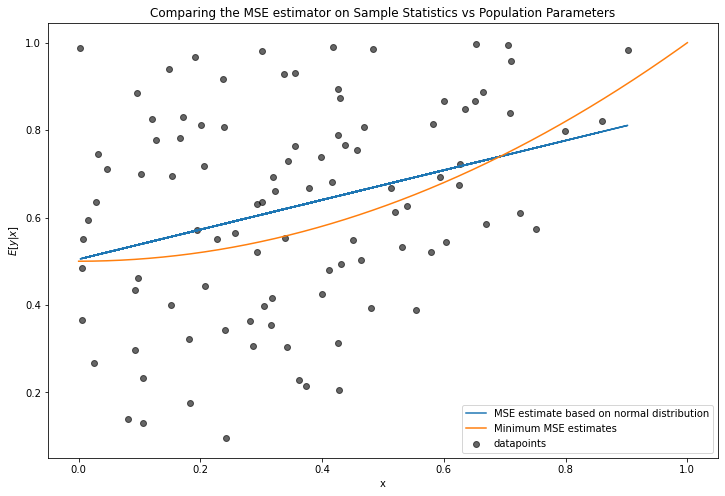

In [29]:
#d)
#create more data points to plot correctly the E[y|x] based on the original distribution
X_line = np.linspace(0,1,1000)
y_line = E_y_given_x(X_line)

fig, axs = plt.subplots(figsize=(12,8))

axs.scatter(X, Y, label = 'datapoints', color = 'black', alpha = 0.6)
axs.plot(X, y_hat_normal, label = 'MSE estimate based on normal distribution')
axs.plot(X_line, y_line, label = 'Minimum MSE estimates')
axs.legend()
axs.set_xlabel('x')
axs.set_ylabel('$E[y|x]$')
axs.title.set_text('Comparing the MSE estimator on Sample Statistics vs Population Parameters')
plt.show()

In [30]:
MSE_normal = (y_hat_normal - Y).T @ (y_hat_normal - Y) / len(X)
MSE_optimal = (y_hat - Y).T @ (y_hat - Y) / len(X)
print('MSE using normal distribution = {} and MSE using the original distribution = {}'.format(MSE_normal, MSE_optimal))

MSE using normal distribution = 0.05047277387382472 and MSE using the original distribution = 0.05107024481058016


The two estimates perform almost the same. In fact, the estimate derived from the normal distribution assumption performs slightly better, but that could be because of the random sample. Though, even when I used more data points, the two estimators had very similar MSE as well. That could be attributed to the following:
Since the sampling distribution is a uniform one, the the E[Y|X] will "slice" the distribution in half. The logic of the E[Y|X] in this case is very similar with the logic of the least squares parameter which will try to minimize the square distance from the observed datapoints